In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
simnum = 0
ns = 10000
rbin = 8
rmin, rmax = 3., 25.
njk = 10
#filename = f'../data/vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{simnum}.dat'
filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

filelist = os.listdir(filedir)
nsim = len(filelist)
print(nsim)

chis = []

# Read all files
for file in filelist:
    data = ascii.read(filedir+file)
    chis.append( data['chi'] )

# Calculate the covariance summation and covariance proper
covsum = np.zeros((rbin,rbin))
chis_mean = np.mean(chis,axis=0)
for i in range(rbin):
    for j in range(rbin):
        for k in range(nsim):
            a = (chis[k][i]-chis_mean[i])
            b = (chis[k][j]-chis_mean[j])
            covsum[i][j] += a*b
# for i in range(rbin):
#     for k in range(nsim):
#         covsum[i]+=(chis[k]-chis_mean)*(chis[k]-chis_mean)
cov = covsum/(nsim-1)


497


In [7]:

# Calculate chi squared
chisq = np.zeros(nsim)
for i in range(nsim):
    a = np.transpose(np.asarray(chis[i])-chis_mean)
    b = (np.asarray(chis[i])-chis_mean)
    c = np.linalg.inv(cov)
    ac = np.dot(a,c)
    chisq[i] = ( np.dot(ac,b) )


In [23]:
c


array([[ 4.94862012e+05, -2.92886865e+05, -3.58623376e+04,
        -4.18321474e+04, -3.83393478e+04,  8.94817246e+04,
        -7.47120763e+04,  1.00113078e+04],
       [-2.92886865e+05,  9.39176402e+05, -4.97310870e+05,
        -4.15911787e+04,  1.78378039e+05, -1.87000849e+05,
         1.01983616e+05, -1.07945960e+04],
       [-3.58623376e+04, -4.97310870e+05,  1.60354327e+06,
        -9.01502112e+05, -5.06734725e+04,  9.13616428e+04,
        -1.93553225e+04,  1.96788582e+04],
       [-4.18321474e+04, -4.15911787e+04, -9.01502112e+05,
         2.55482997e+06, -1.46518644e+06,  2.12729500e+03,
         1.26400343e+05, -2.58172915e+04],
       [-3.83393478e+04,  1.78378039e+05, -5.06734725e+04,
        -1.46518644e+06,  3.74427297e+06, -2.09267220e+06,
         1.24069028e+05,  1.57673096e+04],
       [ 8.94817246e+04, -1.87000849e+05,  9.13616428e+04,
         2.12729500e+03, -2.09267220e+06,  3.36837610e+06,
        -1.33184088e+06,  6.81196306e+04],
       [-7.47120763e+04,  1.019836

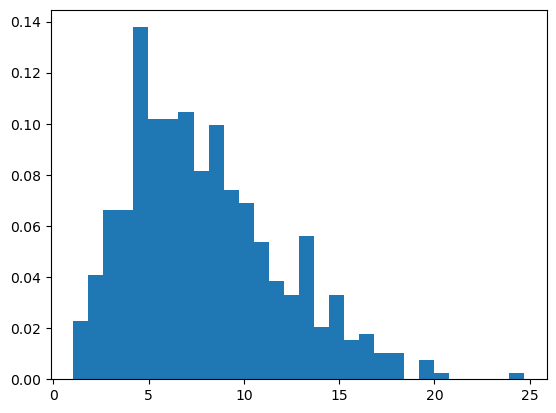

In [8]:

plt.hist(np.asarray(chisq).flatten(),bins=30,color=['C00'],density=True)
#plt.vlines(0.5,0,.6,ls=':',color='k')
plt.show()


In [13]:
cov

array([[2.90417850e-06, 1.29045834e-06, 7.58138410e-07, 5.35629673e-07,
        3.78858561e-07, 3.68871590e-07, 4.21935532e-07, 3.42356723e-07],
       [1.29045834e-06, 1.98559631e-06, 9.67457601e-07, 5.91090056e-07,
        3.60964604e-07, 3.71317890e-07, 2.59186437e-07, 2.35280165e-07],
       [7.58138410e-07, 9.67457601e-07, 1.40851720e-06, 8.53536901e-07,
        6.07798181e-07, 5.56559036e-07, 4.87914959e-07, 4.34867020e-07],
       [5.35629673e-07, 5.91090056e-07, 8.53536901e-07, 1.21416830e-06,
        9.36610192e-07, 9.06282221e-07, 8.88261962e-07, 1.06260382e-06],
       [3.78858561e-07, 3.60964604e-07, 6.07798181e-07, 9.36610192e-07,
        1.33547741e-06, 1.36451614e-06, 1.45915484e-06, 1.73155434e-06],
       [3.68871590e-07, 3.71317890e-07, 5.56559036e-07, 9.06282221e-07,
        1.36451614e-06, 1.97268144e-06, 2.24921630e-06, 2.78926352e-06],
       [4.21935532e-07, 2.59186437e-07, 4.87914959e-07, 8.88261962e-07,
        1.45915484e-06, 2.24921630e-06, 3.68839081e-06, 5.

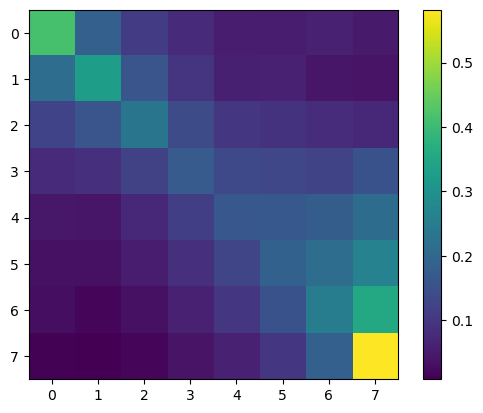

In [22]:
row_sums = cov.sum(axis=1)
new_matrix = cov / row_sums[:, np.newaxis]

plt.imshow(new_matrix)
plt.colorbar()
plt.show()